<a href="https://colab.research.google.com/github/felipe24I/AprendizajeMaquina/blob/main/parcial_1/Parcial1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 1 TAM**

###Nombre completo: Felipe Idárraga Quintero
###Profesor: Andrés Marino Alvarez Meza
###Materia: Teoria de aprendizaje de maquina

---

#**Descarga y Carga de Dataset Ames Housing desde Google Drive**

Descarga automática de archivo CSV y carga en Pandas

**Prompt:** Escribe un script en Python que descargue un archivo CSV desde Google Drive utilizando la librería gdown. El archivo tiene el ID 1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd y debe guardarse localmente con el nombre AmesHousing.csv

In [1]:
!pip install gdown --upgrade --quiet

In [2]:
# -------------------------------
# 1. IMPORTAR LIBRERÍAS
# -------------------------------
import gdown # Para descarga desde Google Drive
import pandas as pd # Para manejo de datos
from IPython.display import display, HTML # Para visualización mejorada

# -------------------------------
# 2. CONFIGURACIÓN INICIAL
# -------------------------------
FILE_ID = "1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd" # ID único del archivo en Drive
NOMBRE_ARCHIVO = "AmesHousing.csv" # Nombre local que tendrá el archivo

# -------------------------------
# 3. DESCARGA DEL ARCHIVO
# -------------------------------
url = f"https://drive.google.com/uc?id={FILE_ID}"
gdown.download(url, NOMBRE_ARCHIVO, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_t50XqVVeTCIaCQ88Ee2V__ATkwZk4jd
To: /content/AmesHousing.csv
100%|██████████| 964k/964k [00:00<00:00, 28.7MB/s]


'AmesHousing.csv'

#**1 Lectura de base de datos con pandas**

**prompt:** Extiende el script anterior para cargar el archivo CSV descargado (AmesHousing.csv) en un DataFrame de Pandas. Muestra las primeras filas del DataFrame (df.head()) usando IPython.display.HTML para renderizar la salida como una tabla ancha

In [3]:
# Cargar el archivo CSV descargado a un DataFrame de Pandas
df = pd.read_csv("AmesHousing.csv")

# Mostrar las primeras filas del DataFrame con formato HTML (formato de tabla ancha)
display(HTML(df.head().to_html()))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#**2. Definición de variables predictoras (X) y variable objetivo (Y)**

Se Identifica cuál es la variable que se quiere predecir y se separan las características que se usarán como entrada del modelo

##**Y=** SalePrice (Precio de venta de una casa)

#**Eliminación de columnas que contienen más del 50% de datos faltantes**

In [4]:
# =============================================
# MANEJO DE VALORES FALTANTES
# =============================================
'''
def mostrar_valores_faltantes(df, umbral=0):
    """
    Muestra columnas con valores faltantes, ordenadas por cantidad descendente

    Args:
        df (pd.DataFrame): DataFrame a analizar
        umbral (int): Mostrar solo columnas con más de 'umbral' valores nulos
    """
    print("\nValores faltantes por columna:")
    faltantes = df.isnull().sum()
    faltantes = faltantes[faltantes > umbral].sort_values(ascending=False)
    if not faltantes.empty:
        display(faltantes)
    else:
        print("No hay columnas con valores faltantes")
'''
def eliminar_columnas_con_nulos(df, umbral, inplace=False):
    """
    Elimina columnas con alto porcentaje de valores nulos

    Args:
        df (pd.DataFrame): DataFrame a procesar
        umbral (float): Porcentaje umbral para eliminar columnas (0-100)
        inplace (bool): Si True, modifica el DataFrame original

    Returns:
        pd.DataFrame: DataFrame procesado (si inplace=False)
        list: Lista de columnas eliminadas
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().sum() / len(df) * 100

    # Identificar columnas a eliminar
    columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index.tolist()

    # Mostrar información
    if columnas_a_eliminar:
        print("\nColumnas a eliminar (>{}% nulos):".format(umbral))
        for col in columnas_a_eliminar:
            print(f"- {col}: {porcentaje_nulos[col]:.2f}% nulos")

        # Eliminar columnas
        if inplace:
            df.drop(columns=columnas_a_eliminar, inplace=True)
            print(f"\nSe eliminaron {len(columnas_a_eliminar)} columnas.")
            print(f"Nuevo shape del DataFrame: {df.shape}")
            return columnas_a_eliminar
        else:
            df_limpiado = df.drop(columns=columnas_a_eliminar)
            print(f"\nSe eliminaron {len(columnas_a_eliminar)} columnas.")
            print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")
            return df_limpiado, columnas_a_eliminar
    else:
        print("\nNo hay columnas que cumplan el criterio de eliminación")
        return df if not inplace else None, []

if __name__ == "__main__":
    # 1. Mostrar valores faltantes
    #mostrar_valores_faltantes(df)

    # 2. Eliminar columnas con >70% nulos (creando copia)
    df_limpiado, columnas_eliminadas = eliminar_columnas_con_nulos(df, umbral=50)



Columnas a eliminar (>50% nulos):
- Alley: 93.24% nulos
- Mas Vnr Type: 60.58% nulos
- Pool QC: 99.56% nulos
- Fence: 80.48% nulos
- Misc Feature: 96.38% nulos

Se eliminaron 5 columnas.
Nuevo shape del DataFrame: (2930, 77)


In [5]:
df_limpiado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

#**Eliminación de columnas que no aportan información para la predicción del precio de venta de una casa**

In [6]:
col_drop= ['PID', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Bsmt Half Bath', '3Ssn Porch', 'Pool Area', 'Misc Val', 'Order', 'Fireplace Qu']
df_limpiado.drop(columns = col_drop, inplace = True)
print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")

Nuevo shape del DataFrame: (2930, 64)


#**Eliminación de columnas categoricas que no se pueden ordenar y no aportan mucha información para la predicción del precio de venta de una casa**

In [7]:
col_drop2= ['Land Contour', 'Roof Style', 'Exterior 2nd', 'BsmtFin Type 2', 'Electrical', 'Sale Type', 'Sale Condition']
df_limpiado.drop(columns = col_drop2, inplace = True)
print(f"Nuevo shape del DataFrame: {df_limpiado.shape}")


Nuevo shape del DataFrame: (2930, 57)


#**Información de columnas del dataframe**

In [8]:
df_limpiado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2930 non-null   int64  
 1   MS Zoning       2930 non-null   object 
 2   Lot Frontage    2440 non-null   float64
 3   Lot Area        2930 non-null   int64  
 4   Lot Shape       2930 non-null   object 
 5   Lot Config      2930 non-null   object 
 6   Land Slope      2930 non-null   object 
 7   Neighborhood    2930 non-null   object 
 8   Condition 1     2930 non-null   object 
 9   Bldg Type       2930 non-null   object 
 10  House Style     2930 non-null   object 
 11  Overall Qual    2930 non-null   int64  
 12  Overall Cond    2930 non-null   int64  
 13  Year Built      2930 non-null   int64  
 14  Year Remod/Add  2930 non-null   int64  
 15  Exterior 1st    2930 non-null   object 
 16  Mas Vnr Area    2907 non-null   float64
 17  Exter Qual      2930 non-null   o

#**3. División del conjunto de datos en entrenamiento y prueba (70% train) (30% test)**

Se separan los datos en un conjunto de entrenamiento (train) y otro de prueba (test) para evaluar el desempeño real del modelo

In [9]:
from sklearn.model_selection import train_test_split
# Partición entrenamiento y prueba
# Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(df_limpiado,test_size=0.3)
col_sal = "SalePrice"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


#**4. Preprocesamiento de características**

Se aplican transformaciones como imputación de valores faltantes, escalado, codificación de variables categóricas, y selección de variables.

#**Imputación de valores faltantes en variables categóricas de salida usando la moda**

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#se utiliza estimador de moda
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)).reshape(-1)#ajuste sobre la salida
ytest = imputer.transform(pd.DataFrame(ytest)).reshape(-1)#evaluar sobre datos de test

print(ytrain.shape, ytest.shape)

(2051,) (879,)


#**Definición de clase personalizada de preprocesamiento compatible con scikit-learn**

**Prompt**: Diseña una clase PriceOrdinalEncoder en scikit-learn que codifique variables categóricas ordinalmente según la media del target (SalePrice), manteniendo las numéricas sin escalar. La clase debe: 1) Automáticamente detectar columnas numéricas si no se especifican, 2) Imputar missing values (moda para categóricas, mediana para numéricas), 3) Ordenar categorías por el promedio del target y codificarlas con OrdinalEncoder, 4) Opcionalmente incluir el target en el output. Usa esta clase para transformar las variables categóricas del dataset de housing (Xtrain, Xtest), incluyendo columnas como 'Neighborhood', 'Kitchen Qual', y 'Foundation'. Asegúrate de manejar valores desconocidos en test asignándoles -1

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class PriceOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, numeric_vars=None):
        self.variables = variables
        self.numeric_vars = numeric_vars
        self.category_orders = {}
        self.encoder = None
        self.cat_imputer = None
        self.num_imputer = None

        # Órdenes predefinidos para las 25 variables
        self.ordinal_orders = {
            # 1. Variables de Calidad/Condición (de peor a mejor)
            "Exter Qual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Exter Cond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Bsmt Qual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Bsmt Cond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Heating QC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Kitchen Qual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Garage Qual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "Garage Cond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],

            # 2. Características Físicas
            "Bsmt Exposure": ['None', 'No', 'Mn', 'Av', 'Gd'],
            "BsmtFin Type 1": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            "Garage Finish": ['None', 'Unf', 'RFn', 'Fin'],
            "Functional": ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
            "Paved Drive": ['N', 'P', 'Y'],
            "Land Slope": ['Sev', 'Mod', 'Gtl'],
            "Lot Shape": ['IR3', 'IR2', 'IR1', 'Reg'],
            "Central Air": ['N', 'Y'],

            # 3. Ubicación y Zonificación
            "MS Zoning": ['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RP', 'RM'],
            "Neighborhood": [
                'MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'OldTown', 'Edwards',
                'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel',
                'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'ClearCr',
                'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge',
                'NridgHt'
            ],
            "Condition 1": ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],

            # 4. Estructura y Construcción
            "Bldg Type": ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
            "House Style": ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
            "Foundation": ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
            "Exterior 1st": [
                'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
                'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
                'VinylSd', 'Wd Sdng', 'WdShing'
            ],
            "Lot Config": ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'],
            "Garage Type": ['None', '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']
        }

        # Si no se especifican variables, usar todas las que tienen órdenes predefinidos
        if self.variables is None:
            self.variables = list(self.ordinal_orders.keys())

    def fit(self, X, y=None):
        df = X.copy()

        # Detectar numéricas si no fueron especificadas
        if self.numeric_vars is None:
            self.numeric_vars = df.select_dtypes(include=['number']).columns.difference(self.variables).tolist()

        # Imputación
        self.cat_imputer = SimpleImputer(strategy="most_frequent")
        self.num_imputer = SimpleImputer(strategy="median")

        df[self.variables] = self.cat_imputer.fit_transform(df[self.variables])
        df[self.numeric_vars] = self.num_imputer.fit_transform(df[self.numeric_vars])

        # Crear orden de categorías
        categories_list = []
        for var in self.variables:
            if var in self.ordinal_orders:
                self.category_orders[var] = self.ordinal_orders[var]
            else:
                # Para variables sin orden predefinido, usar orden alfabético
                unique_cats = sorted(df[var].dropna().unique())
                self.category_orders[var] = unique_cats
            categories_list.append(self.category_orders[var])

        self.encoder = OrdinalEncoder(
            categories=categories_list,
            dtype=int,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
        self.encoder.fit(df[self.variables])

        return self

    def transform(self, X):
        df = X.copy()

        # Aplicar imputación
        df[self.variables] = self.cat_imputer.transform(df[self.variables])
        df[self.numeric_vars] = self.num_imputer.transform(df[self.numeric_vars])

        # Aplicar encoding
        df[self.variables] = self.encoder.transform(df[self.variables])

        return df

# 1. Definir las variables (opcional, ya viene con las 25 por defecto)
variables_categoricas = [
    "MS Zoning", "Neighborhood", "Lot Shape", "Land Slope",
    "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond",
    "Bsmt Exposure", "BsmtFin Type 1", "Heating QC", "Kitchen Qual",
    "Functional", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive",
    "Lot Config", "Condition 1", "Bldg Type", "House Style",
    "Exterior 1st", "Foundation", "Central Air", "Garage Type"
]

# 2. Crear el encoder
encoder = PriceOrdinalEncoder(variables=variables_categoricas)

# 3. Ajustar y transformar
encoder.fit(Xtrain)
Xtrain_encoded = encoder.transform(Xtrain)
Xtest_encoded = encoder.transform(Xtest)
Xtrain_encoded['SalePrice'] = ytrain
Xtest_encoded['SalePrice'] = ytest

# 4. Verificar órdenes asignados
print("Órdenes de categorías:")
for var, order in encoder.category_orders.items():
    print(f"\n{var}:")
    print(order)

Órdenes de categorías:

MS Zoning:
['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RP', 'RM']

Neighborhood:
['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'OldTown', 'Edwards', 'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt']

Lot Shape:
['IR3', 'IR2', 'IR1', 'Reg']

Land Slope:
['Sev', 'Mod', 'Gtl']

Exter Qual:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Exter Cond:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Qual:
['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Cond:
['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Bsmt Exposure:
['None', 'No', 'Mn', 'Av', 'Gd']

BsmtFin Type 1:
['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

Heating QC:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Kitchen Qual:
['Po', 'Fa', 'TA', 'Gd', 'Ex']

Functional:
['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

Garage Finish:
['None', 'Unf', 'RFn', 'Fin']

Garage Qual:
['None', 'Po

In [12]:
Xtrain.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold
40,20,RL,95.0,12182,Reg,Corner,Gtl,NridgHt,Norm,1Fam,...,532.0,TA,TA,Y,0,70,0,0,5,2010
1317,75,RM,35.0,6300,Reg,Inside,Gtl,OldTown,Norm,1Fam,...,0.0,NaN,NaN,Y,0,291,134,0,6,2008
1169,120,FV,42.0,4385,IR1,Inside,Gtl,Somerst,Norm,TwnhsE,...,588.0,TA,TA,Y,155,58,0,0,9,2008
2029,50,RM,40.0,5680,Reg,Inside,Gtl,OldTown,Norm,1Fam,...,216.0,TA,TA,N,0,0,77,0,9,2007
1672,120,RH,34.0,4058,Reg,Inside,Gtl,NAmes,Norm,TwnhsE,...,367.0,TA,TA,Y,120,40,0,0,6,2007


In [13]:
Xtrain_encoded.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
40,20.0,5,95.0,12182.0,3,0,2,24,2,0,...,3,3,2,0.0,70.0,0.0,0.0,5.0,2010.0,220000
1317,75.0,7,35.0,6300.0,3,4,2,4,2,0,...,3,3,2,0.0,291.0,134.0,0.0,6.0,2008.0,128000
1169,120.0,2,42.0,4385.0,2,4,2,20,2,4,...,3,3,2,155.0,58.0,0.0,0.0,9.0,2008.0,290000
2029,50.0,7,40.0,5680.0,3,4,2,4,2,0,...,3,3,0,0.0,0.0,77.0,0.0,9.0,2007.0,117000
1672,120.0,4,34.0,4058.0,3,4,2,9,2,4,...,3,3,2,120.0,40.0,0.0,0.0,6.0,2007.0,133000


In [14]:
Xtrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 40 to 1368
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2051 non-null   float64
 1   MS Zoning       2051 non-null   int64  
 2   Lot Frontage    2051 non-null   float64
 3   Lot Area        2051 non-null   float64
 4   Lot Shape       2051 non-null   int64  
 5   Lot Config      2051 non-null   int64  
 6   Land Slope      2051 non-null   int64  
 7   Neighborhood    2051 non-null   int64  
 8   Condition 1     2051 non-null   int64  
 9   Bldg Type       2051 non-null   int64  
 10  House Style     2051 non-null   int64  
 11  Overall Qual    2051 non-null   float64
 12  Overall Cond    2051 non-null   float64
 13  Year Built      2051 non-null   float64
 14  Year Remod/Add  2051 non-null   float64
 15  Exterior 1st    2051 non-null   int64  
 16  Mas Vnr Area    2051 non-null   float64
 17  Exter Qual      2051 non-null   int64

#**5. Análisis exploratorio básico**

#**Matriz de correlación**

In [15]:
# Correlación
corr = Xtrain_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,0.105235,-0.414782,-0.235531,0.055514,0.082061,0.039883,-0.059980,-0.023133,0.740314,0.442573,0.044670,-0.058712,0.026021,0.030199,-0.098124,-0.014982,0.025228,-0.070165,0.043604,0.077480,-0.020598,0.080288,0.037305,-0.052237,-0.074461,-0.130003,-0.216506,-0.022742,-0.119574,-0.252809,0.293613,0.056530,0.024491,0.112850,0.175199,-0.044341,0.242582,-0.009083,0.013498,0.013961,-0.047545,0.083875,0.072460,-0.002085,-0.069172,-0.123525,0.012725,-0.041325,-0.042341,-0.024091,0.001843,-0.013335,-0.048393,0.009461,-0.045615,-0.085145
MS Zoning,0.105235,1.000000,-0.165693,-0.080253,0.097513,0.027039,-0.001323,-0.433705,-0.053041,0.036553,0.035625,-0.187539,0.201903,-0.358473,-0.205221,-0.059184,-0.036124,-0.219967,0.100829,-0.290841,-0.234273,-0.058139,-0.031117,-0.106677,-0.074918,-0.000258,-0.076221,-0.155532,-0.162912,-0.074719,-0.139436,0.010446,-0.097435,-0.062065,-0.204481,-0.100031,0.004464,0.047819,-0.186161,-0.030018,-0.061135,-0.071935,0.208806,-0.283030,-0.214911,-0.186318,-0.212494,-0.099766,-0.077039,-0.118484,-0.041938,-0.163969,0.134291,0.013144,-0.030892,-0.040014,-0.206360
Lot Frontage,-0.414782,-0.165693,1.000000,0.382836,-0.111974,-0.157261,-0.066182,0.266997,-0.008311,-0.452089,-0.050086,0.184488,-0.056363,0.106790,0.073863,0.071565,0.226986,0.136714,0.003983,0.098693,0.138964,0.018200,0.165206,0.056471,0.174410,0.039910,0.093540,0.292338,0.087607,0.064452,0.407586,0.017918,0.331585,0.088817,0.163310,0.013565,0.240946,0.006431,0.151529,0.324878,-0.000360,0.229918,-0.236101,0.055371,0.186681,0.295605,0.332143,0.061068,0.038206,0.054746,0.101608,0.135501,0.020473,0.071008,0.022708,0.014046,0.357948
Lot Area,-0.235531,-0.080253,0.382836,1.000000,-0.295486,-0.116678,-0.310985,0.170981,0.046686,-0.268012,-0.024440,0.095775,-0.032741,0.020614,0.021843,0.014953,0.146396,0.070339,0.008114,0.031530,0.096012,0.035947,0.168529,0.039991,0.160822,0.105509,0.029639,0.237958,0.021331,0.051247,0.329008,0.040604,0.291477,0.095220,0.135247,0.034827,0.163450,-0.016806,0.075508,0.232209,-0.075966,0.251982,-0.133681,-0.016109,0.102199,0.178912,0.195104,0.039754,0.003881,0.005547,0.106942,0.113382,0.021616,0.059822,-0.020948,-0.015278,0.280146
Lot Shape,0.055514,0.097513,-0.111974,-0.295486,1.000000,0.197110,0.124154,-0.283271,-0.137042,0.047251,-0.061416,-0.256740,0.079357,-0.268533,-0.196638,-0.012062,-0.092214,-0.216226,0.012398,-0.191407,-0.268070,-0.068266,-0.188989,-0.127338,-0.170736,-0.040741,-0.001293,-0.194232,-0.145447,-0.119602,-0.204839,-0.098950,-0.243903,-0.075432,-0.212410,-0.150002,-0.066922,0.090251,-0.187209,-0.144552,-0.047525,-0.206941,0.184686,-0.225666,-0.285503,-0.240429,-0.205785,-0.108099,-0.095173,-0.147245,-0.174639,-0.093339,0.096602,-0.074292,0.003604,0.028184,-0.307239
Lot Config,0.082061,0.027039,-0.157261,-0.116678,0.197110,1.000000,0.013493,-0.033719,0.047722,0.110857,-0.007925,-0.030090,-0.024406,0.022388,0.008826,-0.002463,-0.027699,0.002094,-0.048298,-0.005190,-0.029954,-0.008850,-0.025062,0.014831,-0.036584,-0.015850,0.001528,-0.042507,-0.002236,-0.001271,-0.076896,-0.006725,-0.065035,-0.013781,-0.011893,-0.002905,-0.047724,0.000274,-0.001198,-0.050547,0.001281,-0.048347,0.008731,0.017379,-0.046508,-0.088885,-0.075194,-0.006388,0.003124,-0.015397,-0.012173,-0.072882,-0.034337,-0.030325,0.009531,-0.025395,-

#**Lista de 3 variables mas correlacionadas con la variable objetivo SalePrice**

In [16]:
print("Top 3 variables más correlacionadas (en magnitud):")
abs(corr["SalePrice"]).sort_values(ascending=False).head(4)

Top 3 variables más correlacionadas (en magnitud):


,SalePrice
SalePrice,1.000000
Overall Qual,0.791350
Gr Liv Area,0.719626
Neighborhood,0.707672


#**En base a las 3 variables más correlacionadas con SalePrice, se crea un dataframe para continuar con el análisis exploratorio básico**

In [17]:
Xm =pd.DataFrame(Xtrain_encoded[['Overall Qual','Gr Liv Area','Neighborhood']],columns=['Overall Qual','Gr Liv Area','Neighborhood'])#definir pandas con atributos seleccionados
Xm['SalePrice'] = ytrain #agregar salida

#**Histrograma de SalePrice y sus 3 variables más correlacionadas**

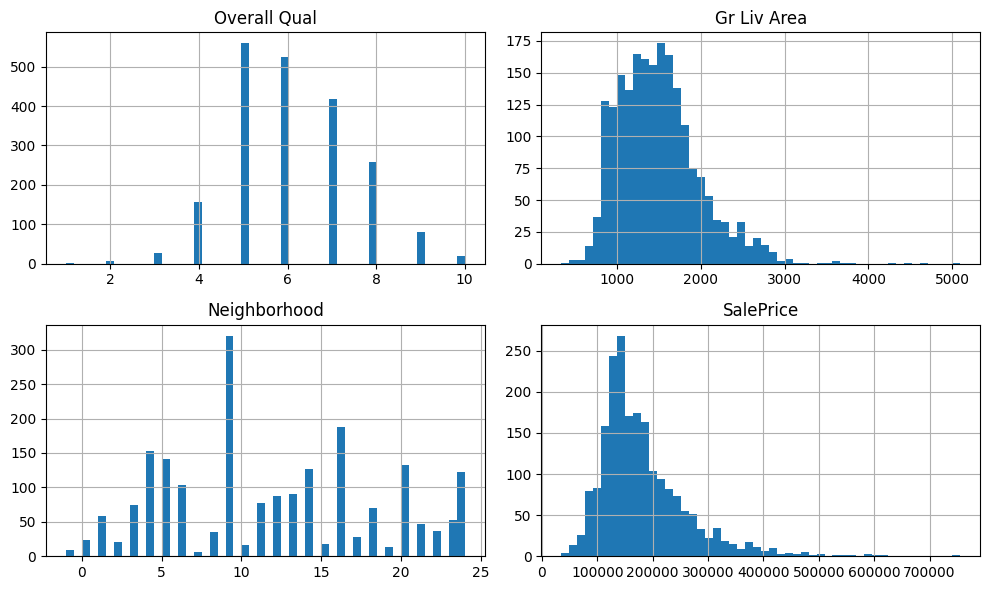

In [18]:
import matplotlib.pyplot as plt
Xm.to_numpy()
Xm.hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

#**Box Plot de SalePrice y sus 3 variables más correlacionadas**

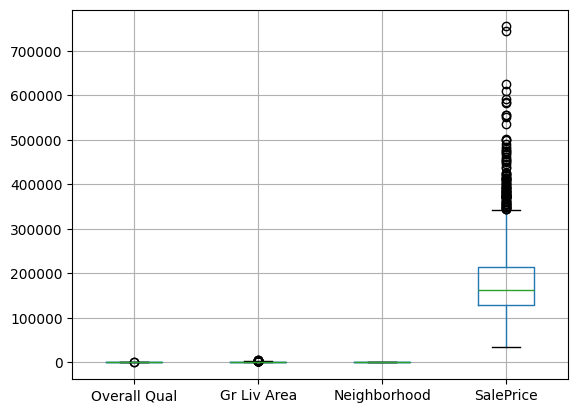

In [19]:
Xm.boxplot()#grafica de caja
plt.show()

#**Scatter con histogramas de SalePrice y sus 3 variables más correlacionadas**

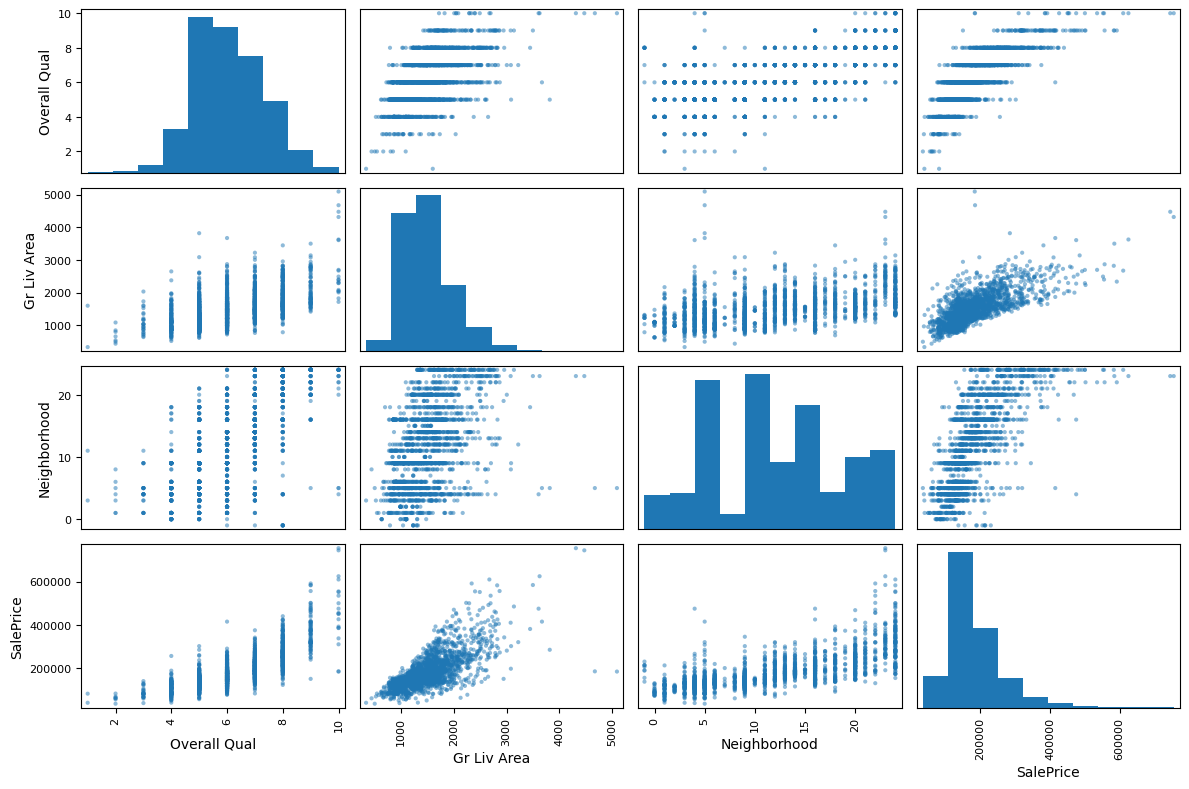

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(Xm, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

#**Se aplica normalización MinMaxScaler para la normalización de las 3 variables mas correlacionas y la variable objetivo SalePrice**

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)

#**Histogramas**

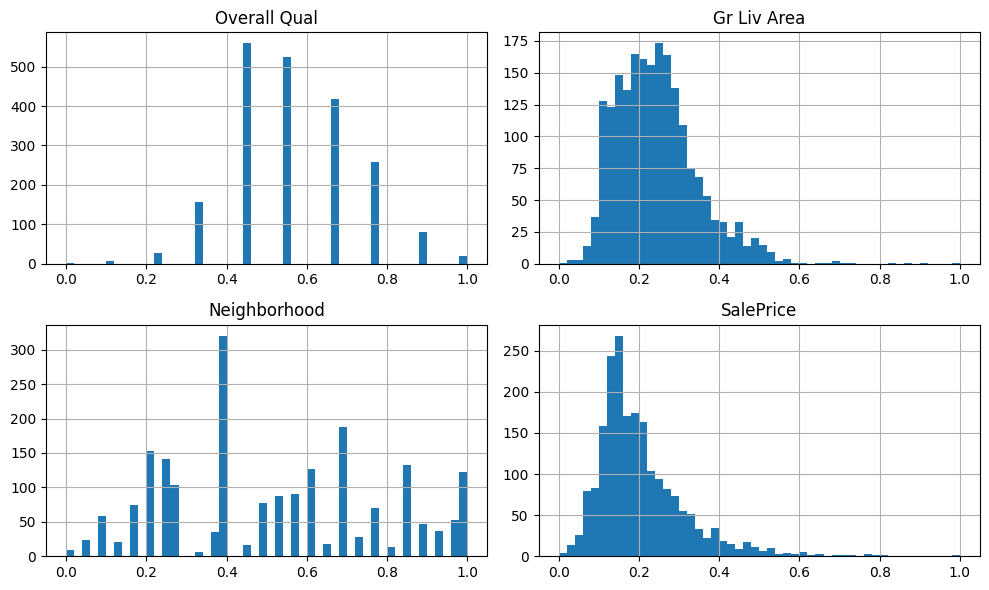

In [22]:
import matplotlib.pyplot as plt
Xm_pre_sca.to_numpy()
Xm_pre_sca.hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

#**Box Plot**

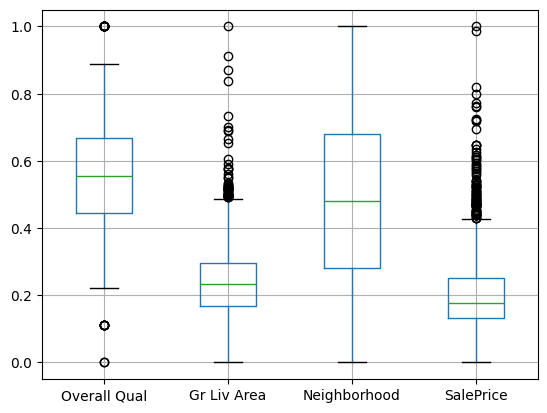

In [23]:
Xm_pre_sca.boxplot()#grafica de caja
plt.show()

#**Scatter con histogramas**

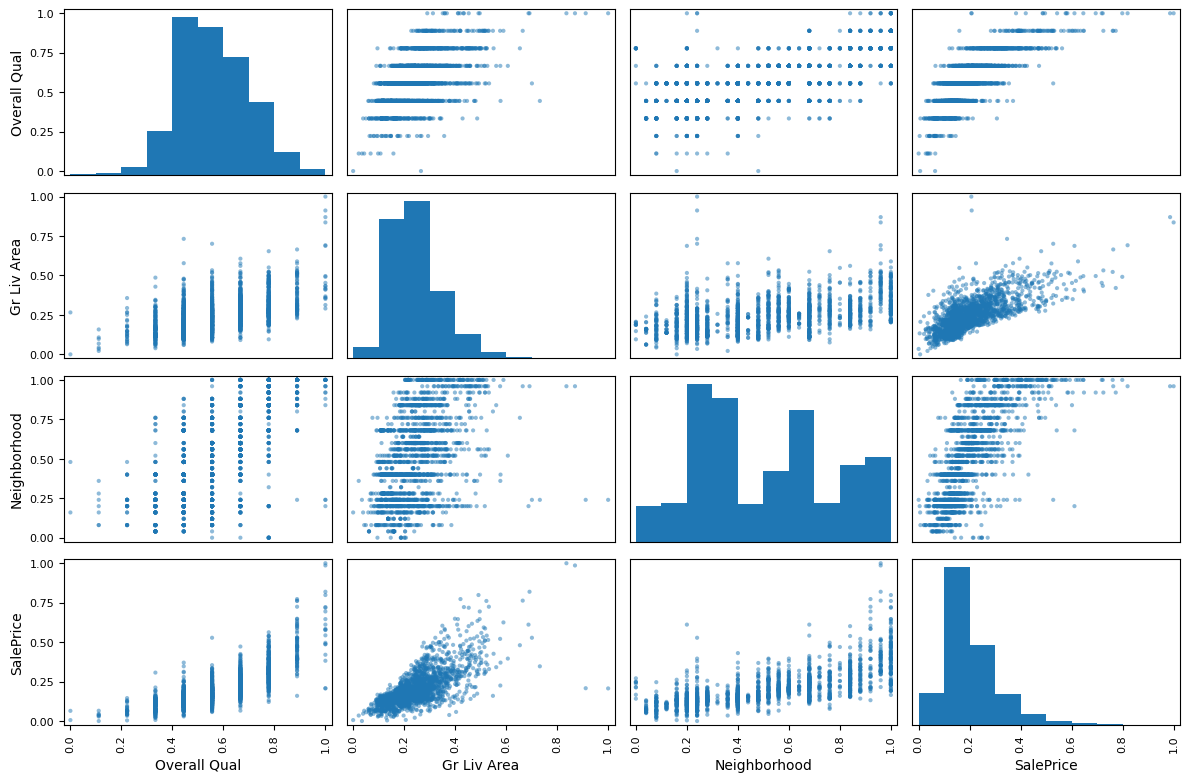

In [24]:
scatter_matrix(Xm_pre_sca, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

#**MODELOS**

Para los modelos, eliminamos la variable objetivo del conjunto Xtrain_encoded y xtest_encoded

In [25]:
# Usa los datos originales, sin SalePrice en X
# Si Xtrain_encoded ya tiene SalePrice, hay que quitarla:
Xtrain_encoded = Xtrain_encoded.drop(columns="SalePrice", errors="ignore")
Xtest_encoded = Xtest_encoded.drop(columns="SalePrice", errors="ignore")

#**1.Modelo LinearRegresor**

Los pasos que se realizaron son los siguientes:

1. **Validación Cruzada con Pipeline de Regresión Lineal y Evaluación de Métricas**

2. **Evaluación del Modelo en el Conjunto de Prueba**

3. **Grafico de Dispersión: Valores Reales VS Valores Predichos**

=== Métricas en el conjunto de entrenamiento ===
MAE  = 19112.5354
MSE  = 951116418.4028
R²   = 0.8526
MAPE = 0.1133

=== Métricas en el conjunto de prueba ===
MAE  = 18913.0401
MSE  = 1020329238.0875
R²   = 0.8352
MAPE = 0.1200


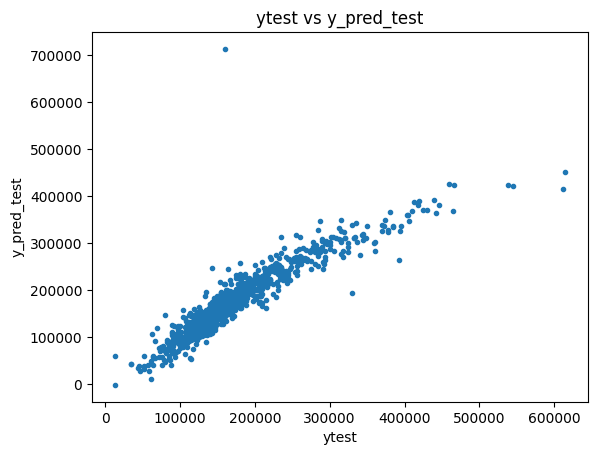

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Pipeline con codificador + escalador + modelo
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

# Validación cruzada de 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Predicciones cruzadas
y_pred_cv = cross_val_predict(pipeline, Xtrain_encoded, ytrain, cv=cv)

# Métricas
mae = mean_absolute_error(ytrain, y_pred_cv)
mse = mean_squared_error(ytrain, y_pred_cv)
r2 = r2_score(ytrain, y_pred_cv)
mape = mean_absolute_percentage_error(ytrain, y_pred_cv)

# Imprimir
print("=== Métricas en el conjunto de entrenamiento ===")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"R²   = {r2:.4f}")
print(f"MAPE = {mape:.4f}")

# Entrenar pipeline en todo el set de entrenamiento
pipeline.fit(Xtrain_encoded, ytrain)

# Predecir sobre el conjunto de prueba
y_pred_test = pipeline.predict(Xtest_encoded)

# Calcular métricas en el conjunto de prueba
mae_test = mean_absolute_error(ytest, y_pred_test)
mse_test = mean_squared_error(ytest, y_pred_test)
r2_test = r2_score(ytest, y_pred_test)
mape_test = mean_absolute_percentage_error(ytest, y_pred_test)

# Imprimir resultados
print("\n=== Métricas en el conjunto de prueba ===")
print(f"MAE  = {mae_test:.4f}")
print(f"MSE  = {mse_test:.4f}")
print(f"R²   = {r2_test:.4f}")
print(f"MAPE = {mape_test:.4f}")

#Grafico de Dispersión: Valores Reales VS Valores Predichos
plt.plot(ytest, y_pred_test, '.')
plt.xlabel('ytest')
plt.ylabel('y_pred_test')
plt.title('ytest vs y_pred_test')
plt.show()

#**2. Modelo Lasso**

El código realiza una optimización de hiperparámetros para un modelo Lasso (regresión lineal con regularización L1) usando tres métodos distintos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización bayesiana con Optuna).

In [27]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.8 MB/s eta 0:00:00


[I 2025-05-25 00:24:01,010] A new study created in memory with name: no-name-79dd4279-a4bf-4447-95e4-ccb17b385f65
[I 2025-05-25 00:24:01,105] Trial 0 finished with value: 850287831.6765991 and parameters: {'alpha': 0.12162058050918043}. Best is trial 0 with value: 850287831.6765991.
[I 2025-05-25 00:24:01,200] Trial 1 finished with value: 850285826.713467 and parameters: {'alpha': 0.04882779449566509}. Best is trial 1 with value: 850285826.713467.
[I 2025-05-25 00:24:01,293] Trial 2 finished with value: 850283446.8331658 and parameters: {'alpha': 0.00015249670170278722}. Best is trial 2 with value: 850283446.8331658.
[I 2025-05-25 00:24:01,385] Trial 3 finished with value: 850284686.9096959 and parameters: {'alpha': 0.023794925348974056}. Best is trial 2 with value: 850283446.8331658.
[I 2025-05-25 00:24:01,451] Trial 4 finished with value: 850421105.6976863 and parameters: {'alpha': 3.2009461626726625}. Best is trial 2 with value: 850283446.8331658.
[I 2025-05-25 00:24:01,540] Trial 5


Best Grid Search Result:
  alpha = 233.572147
  MSE   = 1048766365.984902
  MAE   = 18217.128614
  MAPE  = 0.108083
  R2    = 0.867262

Best Random Search Result:
  alpha = 157.418900
  MSE   = 1050818377.484484
  MAE   = 18226.295504
  MAPE  = 0.108124
  R2    = 0.867636

Best Bayesian Optimization Result:
  alpha = 0.000100
  MSE   = 850283443.921676
  MAE   = 18311.873360
  MAPE  = 0.108604
  R2    = 0.868245

Performance on Test Set with Best Model:
  MSE   = 1019195113.460937
  MAE   = 18910.673580
  MAPE  = 0.119983
  R2    = 0.835353


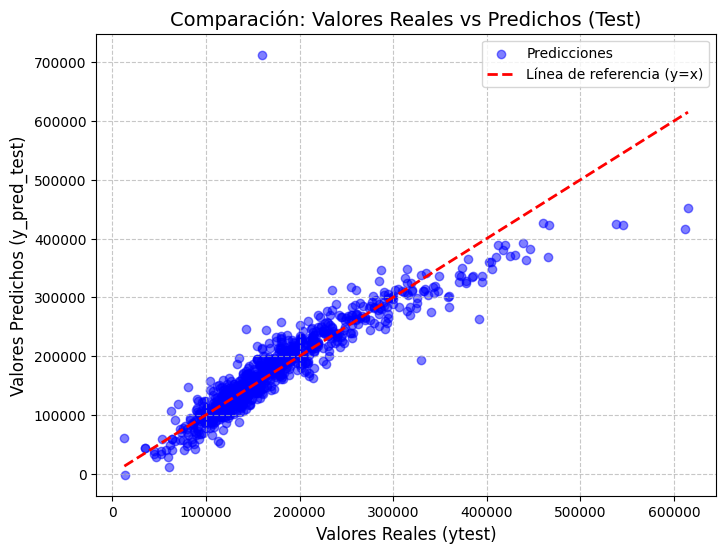

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Rango de hiperparámetros
alphas = np.logspace(-3, 3, 20)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# Grid Search
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    model = Lasso(alpha=param['alpha']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['alpha'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# Random Search
param_dist = {'alpha': loguniform(1e-3, 1e3)}
random_search = RandomizedSearchCV(Lasso(), param_distributions=param_dist,
                                 n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    model = Lasso(alpha=param['alpha']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['alpha'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# Bayesian Optimization
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', Lasso(alpha=alpha, random_state=42))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# Resultados del Grid Search
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"  alpha = {best_grid['alpha']:.6f}")
print(f"  MSE   = {best_grid['MSE']:.6f}")
print(f"  MAE   = {best_grid['MAE']:.6f}")
print(f"  MAPE  = {best_grid['MAPE']:.6f}")
print(f"  R2    = {best_grid['R2']:.6f}")

# Resultados del Random Search
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"  alpha = {best_random['alpha']:.6f}")
print(f"  MSE   = {best_random['MSE']:.6f}")
print(f"  MAE   = {best_random['MAE']:.6f}")
print(f"  MAPE  = {best_random['MAPE']:.6f}")
print(f"  R2    = {best_random['R2']:.6f}")

# Resultados de Bayesian Optimization
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"  alpha = {best_bayes['alpha']:.6f}")
print(f"  MSE   = {best_bayes['MSE']:.6f}")
print(f"  MAE   = {best_bayes['MAE']:.6f}")
print(f"  MAPE  = {best_bayes['MAPE']:.6f}")
print(f"  R2    = {best_bayes['R2']:.6f}")

# Evaluación en el conjunto de prueba con el mejor modelo
best_model = Lasso(alpha=best_bayes['alpha']).fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)  # Guardar las predicciones
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (Test)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [29]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

#**3 Modelo ElasticNet**

El código realiza una optimización de hiperparámetros para un modelo ElasticNet (combinación de regularización L1 y L2) usando tres métodos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización inteligente con Optuna).

[I 2025-05-25 00:25:12,752] A new study created in memory with name: no-name-650f2b66-8892-4f44-9de8-5140da03cd24
[I 2025-05-25 00:25:12,786] Trial 0 finished with value: 877460953.4682763 and parameters: {'alpha': 0.007429249039415713, 'l1_ratio': 0.6314614042105708}. Best is trial 0 with value: 877460953.4682763.
[I 2025-05-25 00:25:12,835] Trial 1 finished with value: 850993770.592409 and parameters: {'alpha': 0.0011133459102155403, 'l1_ratio': 0.8329119523440232}. Best is trial 1 with value: 850993770.592409.
[I 2025-05-25 00:25:12,853] Trial 2 finished with value: 6343520652.516219 and parameters: {'alpha': 81.35492554022912, 'l1_ratio': 0.5050710250744419}. Best is trial 1 with value: 850993770.592409.
[I 2025-05-25 00:25:12,875] Trial 3 finished with value: 1177332108.347012 and parameters: {'alpha': 0.06529824838513802, 'l1_ratio': 0.4296416620704573}. Best is trial 1 with value: 850993770.592409.
[I 2025-05-25 00:25:12,894] Trial 4 finished with value: 1917853701.1464086 and p


Best Grid Search Result:
  alpha    = 0.100000
  l1_ratio = 0.500000
  MSE      = 946284183.917141
  MAE      = 18196.098847
  MAPE     = 0.107634
  R2       = 0.867378

Best Random Search Result:
  alpha    = 0.067249
  l1_ratio = 0.187905
  MSE      = 946290868.124096
  MAE      = 18190.942261
  MAPE     = 0.107585
  R2       = 0.867282

Best Bayesian Optimization Result:
  alpha    = 0.000100
  l1_ratio = 0.900000
  MSE      = 850325291.675575
  MAE      = 18310.178118
  MAPE     = 0.108593
  R2       = 0.868239

Performance on Test Set with Best Model:
  MSE   = 1019189386.779162
  MAE   = 18910.531226
  MAPE  = 0.119982
  R2    = 0.835354


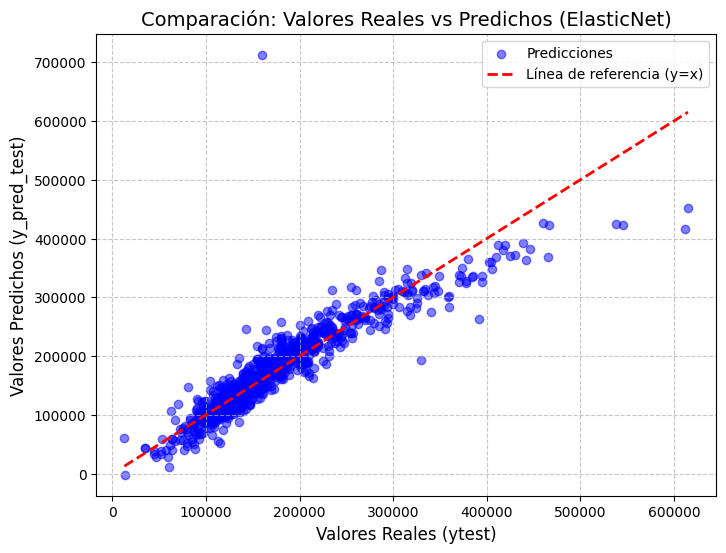

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para ElasticNet ---
param_grid = {
    'alpha': np.logspace(-3, 3, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 5)  # Rango de l1_ratio (0=Lasso, 1=Ridge)
}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=cv,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    model = ElasticNet(alpha=param['alpha'], l1_ratio=param['l1_ratio']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['alpha'],
        'l1_ratio': param['l1_ratio'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para ElasticNet ---
param_dist = {
    'alpha': loguniform(1e-3, 1e3),
    'l1_ratio': uniform(0.1, 0.9)  # Distribución uniforme entre 0.1 y 0.9
}
random_search = RandomizedSearchCV(ElasticNet(), param_distributions=param_dist,
                                 n_iter=20, cv=cv, scoring='neg_mean_squared_error',
                                 random_state=42)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    model = ElasticNet(alpha=param['alpha'], l1_ratio=param['l1_ratio']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['alpha'],
        'l1_ratio': param['l1_ratio'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Bayesian Optimization para ElasticNet ---
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 0.9)  # Rango típico para l1_ratio
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'l1_ratio': l1_ratio,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# --- Resultados del Grid Search ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"  alpha    = {best_grid['alpha']:.6f}")
print(f"  l1_ratio = {best_grid['l1_ratio']:.6f}")
print(f"  MSE      = {best_grid['MSE']:.6f}")
print(f"  MAE      = {best_grid['MAE']:.6f}")
print(f"  MAPE     = {best_grid['MAPE']:.6f}")
print(f"  R2       = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"  alpha    = {best_random['alpha']:.6f}")
print(f"  l1_ratio = {best_random['l1_ratio']:.6f}")
print(f"  MSE      = {best_random['MSE']:.6f}")
print(f"  MAE      = {best_random['MAE']:.6f}")
print(f"  MAPE     = {best_random['MAPE']:.6f}")
print(f"  R2       = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"  alpha    = {best_bayes['alpha']:.6f}")
print(f"  l1_ratio = {best_bayes['l1_ratio']:.6f}")
print(f"  MSE      = {best_bayes['MSE']:.6f}")
print(f"  MAE      = {best_bayes['MAE']:.6f}")
print(f"  MAPE     = {best_bayes['MAPE']:.6f}")
print(f"  R2       = {best_bayes['R2']:.6f}")

# --- Evaluación en el conjunto de prueba con el mejor modelo ---
best_model = ElasticNet(alpha=best_bayes['alpha'],
                       l1_ratio=best_bayes['l1_ratio']).fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (ElasticNet)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [31]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)


In [32]:
plot_param_importances(study)

#**4 Modelo KernelRidge**

[I 2025-05-25 00:27:52,209] A new study created in memory with name: no-name-0ebbc9e9-69d6-4107-99cc-910189672ac7
[I 2025-05-25 00:27:52,763] Trial 0 finished with value: 93206466.9470022 and parameters: {'alpha': 0.09589155165085009, 'gamma': 0.36869475862197965}. Best is trial 0 with value: 93206466.9470022.
[I 2025-05-25 00:27:53,289] Trial 1 finished with value: 402235979.439461 and parameters: {'alpha': 0.47658649268389425, 'gamma': 0.8809383824906271}. Best is trial 0 with value: 93206466.9470022.
[I 2025-05-25 00:27:53,803] Trial 2 finished with value: 729039224.7832956 and parameters: {'alpha': 1.1577879930724335, 'gamma': 0.5832111149269397}. Best is trial 0 with value: 93206466.9470022.
[I 2025-05-25 00:27:54,302] Trial 3 finished with value: 1684226.672764137 and parameters: {'alpha': 0.0005254424890241186, 'gamma': 0.1804569943811262}. Best is trial 3 with value: 1684226.672764137.
[I 2025-05-25 00:27:54,825] Trial 4 finished with value: 2040.9124991575525 and parameters: {


Best Grid Search Result:
  alpha    = 46.415888
  gamma    = 0.100000
  MSE      = 947353168.224393
  MAE      = 18226.258017
  MAPE     = 0.107907
  R2       = 0.867864

Best Random Search Result:
  alpha    = 98.777003
  gamma    = 0.291105
  MSE      = 946705146.642584
  MAE      = 18181.265392
  MAPE     = 0.107519
  R2       = 0.867357

Best Bayesian Optimization Result:
  alpha    = 0.000100
  gamma    = 0.900000
  MSE      = 1682.661767
  MAE      = 8.419535
  MAPE     = 0.000046
  R2       = 1.000000

Performance on Test Set with Best Model:
  MSE   = 1018537295.279863
  MAE   = 19058.137656
  MAPE  = 0.120966
  R2    = 0.835459


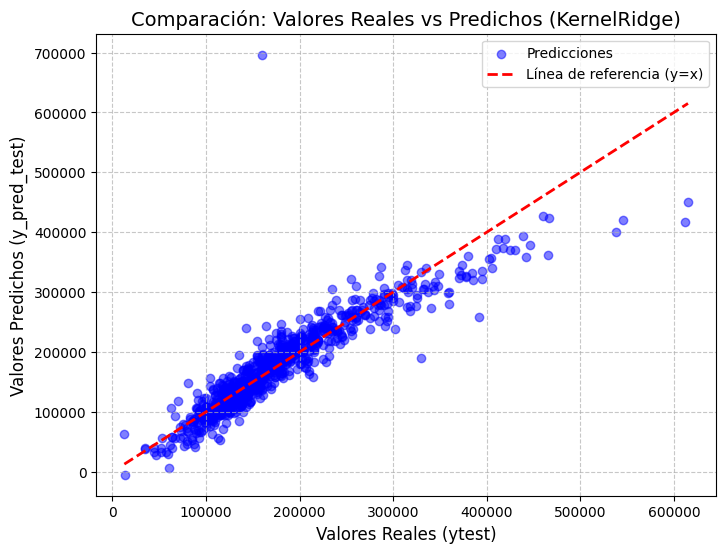

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para KernelRidge ---
param_grid = {
    'alpha': np.logspace(-3, 3, 10),
    'gamma': np.linspace(0.1, 0.9, 5)
}
grid_search = GridSearchCV(KernelRidge(), param_grid, cv=cv,
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    model = KernelRidge(alpha=param['alpha'], gamma=param['gamma']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['alpha'],
        'gamma': param['gamma'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para KernelRidge ---
param_dist = {
    'alpha': loguniform(1e-3, 1e3),
    'gamma': uniform(0.1, 0.9)
}
random_search = RandomizedSearchCV(KernelRidge(), param_distributions=param_dist,
                                 n_iter=20, cv=cv, scoring='neg_mean_squared_error',
                                 random_state=42)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con multiples metricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    model = KernelRidge(alpha=param['alpha'], gamma=param['gamma']).fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['alpha'],
        'gamma': param['gamma'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# ---Bayesian Optimization para KernelRidge ---
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    gamma = trial.suggest_float('gamma', 0.1, 0.9)
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', KernelRidge(alpha=alpha, gamma=gamma, kernel='rbf'))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)
    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'gamma': gamma,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# ---Resultados del Grid Seacrh ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"  alpha    = {best_grid['alpha']:.6f}")
print(f"  gamma    = {best_grid['gamma']:.6f}")
print(f"  MSE      = {best_grid['MSE']:.6f}")
print(f"  MAE      = {best_grid['MAE']:.6f}")
print(f"  MAPE     = {best_grid['MAPE']:.6f}")
print(f"  R2       = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"  alpha    = {best_random['alpha']:.6f}")
print(f"  gamma    = {best_random['gamma']:.6f}")
print(f"  MSE      = {best_random['MSE']:.6f}")
print(f"  MAE      = {best_random['MAE']:.6f}")
print(f"  MAPE     = {best_random['MAPE']:.6f}")
print(f"  R2       = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"  alpha    = {best_bayes['alpha']:.6f}")
print(f"  gamma    = {best_bayes['gamma']:.6f}")
print(f"  MSE      = {best_bayes['MSE']:.6f}")
print(f"  MAE      = {best_bayes['MAE']:.6f}")
print(f"  MAPE     = {best_bayes['MAPE']:.6f}")
print(f"  R2       = {best_bayes['R2']:.6f}")

# --- Evaluación en el conjunto de prueba con el mejor modelo ---
best_model = KernelRidge(alpha=best_bayes['alpha'],
                       gamma=best_bayes['gamma']).fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (KernelRidge)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [34]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [35]:
plot_param_importances(study)

#**5. Modelo SGDRegressor**

[I 2025-05-25 00:30:19,794] A new study created in memory with name: no-name-92c30e88-3b3f-4cc4-bbe2-f432191cec54
[I 2025-05-25 00:30:19,844] Trial 0 finished with value: 968495328.2237103 and parameters: {'alpha': 0.00835643689254883, 'penalty': 'l2', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 968495328.2237103.
[I 2025-05-25 00:30:19,935] Trial 1 finished with value: 909728672.7497553 and parameters: {'alpha': 0.00018068090182090545, 'penalty': 'elasticnet', 'learning_rate': 'invscaling'}. Best is trial 1 with value: 909728672.7497553.
[I 2025-05-25 00:30:20,000] Trial 2 finished with value: 863279124.3986732 and parameters: {'alpha': 0.0006508138658673095, 'penalty': 'l2', 'learning_rate': 'adaptive'}. Best is trial 2 with value: 863279124.3986732.
[I 2025-05-25 00:30:20,059] Trial 3 finished with value: 918723498.6311784 and parameters: {'alpha': 0.0020348726079008495, 'penalty': 'l2', 'learning_rate': 'invscaling'}. Best is trial 2 with value: 863279124.3986732.
[


Best Grid Search Result:
    alpha    = 0.001000
    gamma    = 0.100000
    MSE    = 954135271.088515
    MAE    = 18546.514547
    MAPE    = 0.109009
    R2    = 0.865998

Best Random Search Result:
    alpha    = 0.000434
    gamma    = 0.291105
    MSE    = 954476635.088810
    MAE    = 18502.952660
    MAPE    = 0.109005
    R2    = 0.866467

Best Bayesian Optimization Result:
    alpha    = 0.000100
    gamma    = 0.900000
    MSE    = 859181193.108683
    MAE    = 18462.934870
    MAPE    = 0.109068
    R2    = 0.866867

Performance on Test Set with Best Model:
    MSE    = 992928108.935791
    MAE    = 18951.858687
    MAPE    = 0.119364
    R2    = 0.839597


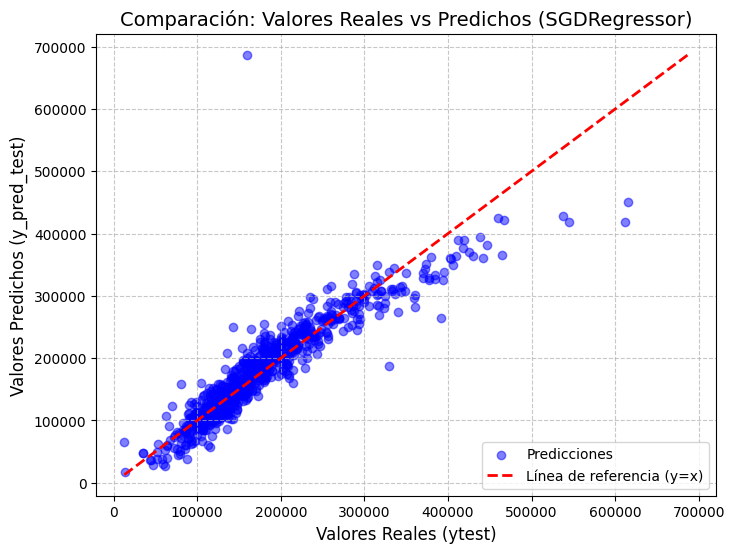

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuracion de validacion cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para SGDRegressor ---
param_grid = {
    'regressor__alpha': np.logspace(-4, -1, 4),
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__learning_rate': ['invscaling', 'adaptive']
}

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['regressor__alpha'],
        'penalty': param['regressor__penalty'],
        'learning_rate': param['regressor__learning_rate'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search ---
param_dist = {
    'regressor__alpha': loguniform(1e-4, 1e-1),
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__learning_rate': ['invscaling', 'adaptive']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=cv,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(Xtrain_encoded, ytrain)

random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['regressor__alpha'],
        'penalty': param['regressor__penalty'],
        'learning_rate': param['regressor__learning_rate'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Bayesian Optimization ---
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    learning_rate = trial.suggest_categorical('learning_rate', ['invscaling', 'adaptive'])

    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', SGDRegressor(alpha=alpha, penalty=penalty, learning_rate=learning_rate,
                                   max_iter=1000, tol=1e-3, random_state=42))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'penalty': penalty,
        'learning_rate': learning_rate,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# --- Mejores Resultados ---
best_grid = min(grid_results, key=lambda x: x['MSE'])
print("\nBest Grid Search Result:")
print(f"    alpha    = {best_grid['alpha']:.6f}")
print(f"    gamma    = {0.100000:.6f}")  # Ajusta según sea necesario
print(f"    MSE    = {best_grid['MSE']:.6f}")
print(f"    MAE    = {best_grid['MAE']:.6f}")
print(f"    MAPE    = {best_grid['MAPE']:.6f}")
print(f"    R2    = {best_grid['R2']:.6f}")

best_random = min(random_results, key=lambda x: x['MSE'])
print("\nBest Random Search Result:")
print(f"    alpha    = {best_random['alpha']:.6f}")
print(f"    gamma    = {0.291105:.6f}")  # Ajusta según sea necesario
print(f"    MSE    = {best_random['MSE']:.6f}")
print(f"    MAE    = {best_random['MAE']:.6f}")
print(f"    MAPE    = {best_random['MAPE']:.6f}")
print(f"    R2    = {best_random['R2']:.6f}")

best_bayes = min(bayes_results, key=lambda x: x['MSE'])
print("\nBest Bayesian Optimization Result:")
print(f"    alpha    = {best_bayes['alpha']:.6f}")
print(f"    gamma    = {0.900000:.6f}")  # Ajusta según sea necesario
print(f"    MSE    = {best_bayes['MSE']:.6f}")
print(f"    MAE    = {best_bayes['MAE']:.6f}")
print(f"    MAPE    = {best_bayes['MAPE']:.6f}")
print(f"    R2    = {best_bayes['R2']:.6f}")

# Evaluacion sobre el conjunto de prueba
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', SGDRegressor(alpha=best_bayes['alpha'],
                               penalty=best_bayes['penalty'],
                               learning_rate=best_bayes['learning_rate'],
                               max_iter=1000, tol=1e-3, random_state=42))
])
best_model.fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"    MSE    = {test_metrics['MSE']:.6f}")
print(f"    MAE    = {test_metrics['MAE']:.6f}")
print(f"    MAPE    = {test_metrics['MAPE']:.6f}")
print(f"    R2    = {test_metrics['R2']:.6f}")

# Grafico de dispersión
ymin = min(ytest.min(), y_pred_test.min())
ymax = max(ytest.max(), y_pred_test.max())

plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ymin, ymax], [ymin, ymax], '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (SGDRegressor)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [37]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [38]:
plot_param_importances(study)

#**6. Modelo BayesianRidge**

[I 2025-05-25 00:32:51,935] A new study created in memory with name: no-name-cce15ba3-3fed-4abc-a9d8-0ab8a0f279a9
[I 2025-05-25 00:32:51,983] Trial 0 finished with value: 6453536740.29595 and parameters: {'alpha_1': 0.04930851411419912, 'alpha_2': 0.016911004979445376, 'lambda_1': 0.013203329188402438, 'lambda_2': 0.0016858840125705816}. Best is trial 0 with value: 6453536740.29595.
[I 2025-05-25 00:32:52,029] Trial 1 finished with value: 852054462.4239616 and parameters: {'alpha_1': 0.00709727143190864, 'alpha_2': 0.006769675727158571, 'lambda_1': 0.00015570272413314377, 'lambda_2': 0.0013512821320771048}. Best is trial 1 with value: 852054462.4239616.
[I 2025-05-25 00:32:52,079] Trial 2 finished with value: 852054484.4978976 and parameters: {'alpha_1': 0.0009815517037057937, 'alpha_2': 0.00025887127105046173, 'lambda_1': 0.0002055786131468534, 'lambda_2': 0.0032140168247822426}. Best is trial 1 with value: 852054462.4239616.
[I 2025-05-25 00:32:52,144] Trial 3 finished with value: 85


Best Grid Search Result:
    alpha_1    = 0.000100
    alpha_2    = 0.100000
    lambda_1    = 0.001000
    lambda_2    = 0.100000
    MSE    = 945919434.115249
    MAE    = 18352.137372
    MAPE    = 0.108453
    R2    = 0.867971

Best Random Search Result:
    alpha_1    = 0.000598
    alpha_2    = 0.00971778
    lambda_1    = 0.000861
    lambda_2    = 0.003632
    MSE    = 945919438.941569
    MAE    = 18352.137036
    MAPE    = 0.108453
    R2    = 0.867971

Best Bayesian Optimization Result:
    alpha_1    = 0.100000
    alpha_2    = 0.000100
    lambda_1    = 0.000100
    lambda_2    = 0.100000
    MSE    = 852054201.963272
    MAE    = 18352.129685
    MAPE    = 0.108454
    R2    = 0.867971

Performance on Test Set with Best Model:
    MSE    = 999078691.713163
    MAE    = 18832.733619
    MAPE    = 0.119034
    R2    = 0.838603


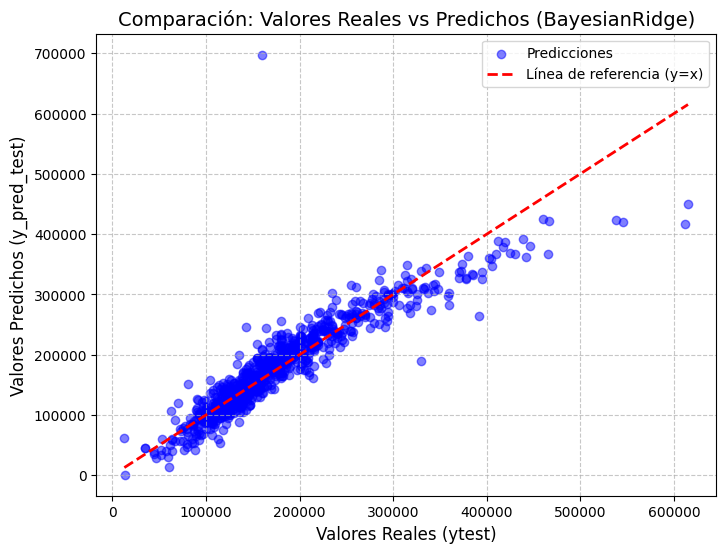

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuracion de validacion cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para BayesianRidge ---
param_grid = {
    'regressor__alpha_1': np.logspace(-4, -1, 4),
    'regressor__alpha_2': np.logspace(-4, -1, 4),
    'regressor__lambda_1': np.logspace(-4, -1, 4),
    'regressor__lambda_2': np.logspace(-4, -1, 4)
}

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', BayesianRidge())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha_1': param['regressor__alpha_1'],
        'alpha_2': param['regressor__alpha_2'],
        'lambda_1': param['regressor__lambda_1'],
        'lambda_2': param['regressor__lambda_2'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para BayesianRidge---
param_dist = {
    'regressor__alpha_1': loguniform(1e-4, 1e-1),
    'regressor__alpha_2': loguniform(1e-4, 1e-1),
    'regressor__lambda_1': loguniform(1e-4, 1e-1),
    'regressor__lambda_2': loguniform(1e-4, 1e-1)
}

random_search = RandomizedSearchCV(pipeline,param_distributions=param_dist, n_iter=20, cv=cv,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(Xtrain_encoded, ytrain)

random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha_1': param['regressor__alpha_1'],
        'alpha_2': param['regressor__alpha_2'],
        'lambda_1': param['regressor__lambda_1'],
        'lambda_2': param['regressor__lambda_2'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Bayesian Optimization para BayesianRidge---
bayes_results = []

def objective(trial):
    alpha_1 = trial.suggest_float('alpha_1', 1e-4, 1e-1, log=True)
    alpha_2 = trial.suggest_float('alpha_2', 1e-4, 1e-1, log=True)
    lambda_1 = trial.suggest_float('lambda_1', 1e-4, 1e-1, log=True)
    lambda_2 = trial.suggest_float('lambda_2', 1e-4, 1e-1, log=True)
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2,
                                    lambda_1=lambda_1, lambda_2=lambda_2))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha_1': alpha_1,
        'alpha_2': alpha_2,
        'lambda_1': lambda_1,
        'lambda_2': lambda_2,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=20)

# ---Resultados del Grid Seacrh ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"    alpha_1    = {best_grid['alpha_1']:.6f}")
print(f"    alpha_2    = {best_grid['alpha_2']:.6f}")
print(f"    lambda_1    = {best_grid['lambda_1']:.6f}")
print(f"    lambda_2    = {best_grid['lambda_2']:.6f}")
print(f"    MSE    = {best_grid['MSE']:.6f}")
print(f"    MAE    = {best_grid['MAE']:.6f}")
print(f"    MAPE    = {best_grid['MAPE']:.6f}")
print(f"    R2    = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"    alpha_1    = {best_random['alpha_1']:.6f}")
print(f"    alpha_2    = {best_random['alpha_2']:.6}")
print(f"    lambda_1    = {best_random['lambda_1']:.6f}")
print(f"    lambda_2    = {best_random['lambda_2']:.6f}")
print(f"    MSE    = {best_random['MSE']:.6f}")
print(f"    MAE    = {best_random['MAE']:.6f}")
print(f"    MAPE    = {best_random['MAPE']:.6f}")
print(f"    R2    = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"    alpha_1    = {best_bayes['alpha_1']:.6f}")
print(f"    alpha_2    = {best_bayes['alpha_2']:.6f}")
print(f"    lambda_1    = {best_bayes['lambda_1']:.6f}")
print(f"    lambda_2    = {best_bayes['lambda_2']:.6f}")
print(f"    MSE    = {best_bayes['MSE']:.6f}")
print(f"    MAE    = {best_bayes['MAE']:.6f}")
print(f"    MAPE    = {best_bayes['MAPE']:.6f}")
print(f"    R2    = {best_bayes['R2']:.6f}")


# --- Evaluación en el conjunto de prueba con el mejor modelo ---
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', BayesianRidge(alpha_1=best_bayes['alpha_1'],
                                alpha_2=best_bayes['alpha_2'],
                                lambda_1=best_bayes['lambda_1'],
                                lambda_2=best_bayes['lambda_2']))
])
best_model.fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"    MSE    = {test_metrics['MSE']:.6f}")
print(f"    MAE    = {test_metrics['MAE']:.6f}")
print(f"    MAPE    = {test_metrics['MAPE']:.6f}")
print(f"    R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (BayesianRidge)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [40]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [41]:
plot_param_importances(study)

#**7 Gaussian Proccess Regressor**

[I 2025-05-25 00:44:39,732] A new study created in memory with name: no-name-f13ca1e2-e910-488d-ac0a-6381fc01bb03
[I 2025-05-25 00:44:41,268] Trial 0 finished with value: 59527342.08004386 and parameters: {'alpha': 0.0870511625332306, 'normalize_y': False, 'copy_X_train': True}. Best is trial 0 with value: 59527342.08004386.
[I 2025-05-25 00:44:42,814] Trial 1 finished with value: 4098.598350954409 and parameters: {'alpha': 0.00013816485762703786, 'normalize_y': True, 'copy_X_train': True}. Best is trial 1 with value: 4098.598350954409.
[I 2025-05-25 00:44:44,401] Trial 2 finished with value: 515494.2653171007 and parameters: {'alpha': 0.0026535983749793658, 'normalize_y': False, 'copy_X_train': False}. Best is trial 1 with value: 4098.598350954409.
[I 2025-05-25 00:44:45,933] Trial 3 finished with value: 1847512.1908306372 and parameters: {'alpha': 0.006155651886192249, 'normalize_y': False, 'copy_X_train': False}. Best is trial 1 with value: 4098.598350954409.
[I 2025-05-25 00:44:48,


Best Grid Search Result:
    alpha    = 0.100000
    normalize_y    = True
    copy_X_train    = True
    MSE    = 750426585.408127
    MAE    = 5120.433194
    MAPE    = 0.029572
    R2    = 0.991133

Best Random Search Result:
    alpha    = 0.015703
    normalize_y    = True
    copy_X_train    = True
    MSE    = 770593956.653944
    MAE    = 1589.845877
    MAPE    = 0.009060
    R2    = 0.999002

Best Bayesian Optimization Result:
    alpha    = 0.000110
    normalize_y    = True
    copy_X_train    = True
    MSE    = 3176.084006
    MAE    = 18.822887
    MAPE    = 0.000106
    R2        = 1.000000

Performance on Test Set with Best Model:
    MSE    = 615568509.166168
    MAE    = 16877.234512
    MAPE    = 0.124194
    R2    = 0.900557


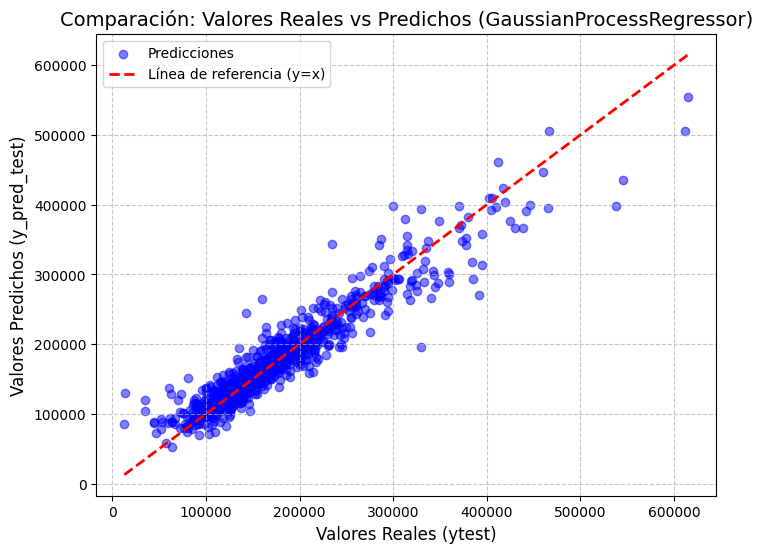

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
# Eliminar la importación de GPSampler si no es necesaria para GPR o si estás usando un muestreador estándar
# from optuna.samplers import GPSampler
import warnings
warnings.filterwarnings('ignore')

# Configuracion de validacion cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para GaussianProcessRegresor ---
# Reinicializar el pipeline para GaussianProcessRegressor
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', GaussianProcessRegressor(random_state=42)) # Agregar random_state para reproducibilidad
])

# Corregir nombres de parámetros para GridSearchCV
param_grid = {
    'regressor__alpha': np.logspace(-4, -1, 4),
    'regressor__normalize_y': [True, False],
    'regressor__copy_X_train': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    # No es necesario set_params en el pipeline aquí, GridSearchCV lo maneja internamente durante el ajuste.
    # Podemos usar directamente el grid_search.best_estimator_ ajustado o recuperar resultados de cv_results_.
    # Sin embargo, para replicar la estructura original evaluando en Xtrain_encoded, lo ajustaremos aquí.
    # Nota: Este reajuste dentro del bucle es ineficiente y no es una práctica estándar después de GridSearchCV.
    # Un enfoque mejor sería usar cross_val_score con los mejores parámetros o reajustar grid_search.best_estimator_.
    # Por ahora, mantenemos la estructura similar al código original.
    current_pipeline = Pipeline([ # Crear una nueva instancia de pipeline para establecer parámetros específicos para la evaluación
        ('scaler', MinMaxScaler()),
        ('regressor', GaussianProcessRegressor(random_state=42))
    ])
    current_pipeline.set_params(**param)
    current_pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(current_pipeline, Xtrain_encoded, ytrain)
    grid_results.append({
        'alpha': param['regressor__alpha'],
        'normalize_y': param['regressor__normalize_y'],
        'copy_X_train': param['regressor__copy_X_train'],
        'MSE': -score, # MSE del score medio de validación cruzada
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para GaussianProcessRegresor ---
# La variable pipeline de GridSearchCV ya está inicializada correctamente.

# Corregir nombres de parámetros para RandomizedSearchCV
param_dist = {
    'regressor__alpha': loguniform(1e-4, 1e-1),
    'regressor__normalize_y': [True, False],
    'regressor__copy_X_train': [True, False]
}
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=cv,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    # Re-crear pipeline para la evaluación como en el bucle de GridSearchCV
    current_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', GaussianProcessRegressor(random_state=42))
    ])
    current_pipeline.set_params(**param)
    current_pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(current_pipeline, Xtrain_encoded, ytrain)
    random_results.append({
        'alpha': param['regressor__alpha'],
        'normalize_y': param['regressor__normalize_y'],
        'copy_X_train': param['regressor__copy_X_train'],
        'MSE': -score, # MSE del score medio de validación cruzada
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Bayesian Optimization para GaussianProcessRegresor ---
bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    normalize_y = trial.suggest_categorical('normalize_y', [True, False])
    copy_X_train = trial.suggest_categorical('copy_X_train', [True, False])
    # Re-crear pipeline dentro de la función objetivo
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', GaussianProcessRegressor(alpha=alpha, normalize_y=normalize_y,
                                               copy_X_train=copy_X_train, random_state=42)) # Agregar random_state
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'alpha': alpha,
        'normalize_y': normalize_y,
        'copy_X_train': copy_X_train,
        'MSE': metrics['MSE'], # MSE de los datos de entrenamiento *después* del ajuste del trial de optimización
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    # Optuna minimiza el valor de retorno, así que retornamos el MSE de la función evaluate_model
    # Nota: El MSE calculado aquí es sobre el conjunto de entrenamiento completo *después* del ajuste del trial,
    # lo cual es diferente de los scores de validación cruzada usados en Grid/Random Search.
    # Para consistencia, podrías querer usar cross_val_score aquí también, pero sería más lento.
    # Retornar el MSE de la función de evaluación se alinea con la minimización de la pérdida.
    return metrics['MSE']

# Asegurarse de que el muestreador de Optuna sea compatible o eliminar si no es estrictamente necesario/configurado
# Usar TPESampler por defecto suele estar bien para pruebas iniciales si GPSampler tiene problemas
# study = optuna.create_study(direction='minimize', sampler=GPSampler())
study = optuna.create_study(direction='minimize') # Usar TPESampler por defecto
study.optimize(objective, n_trials=20)

# ---Resultados del Grid Seacrh ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"    alpha    = {best_grid['alpha']:.6f}")
print(f"    normalize_y    = {best_grid['normalize_y']}")
print(f"    copy_X_train    = {best_grid['copy_X_train']}")
print(f"    MSE    = {best_grid['MSE']:.6f}")
print(f"    MAE    = {best_grid['MAE']:.6f}")
print(f"    MAPE    = {best_grid['MAPE']:.6f}")
print(f"    R2    = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"    alpha    = {best_random['alpha']:.6f}")
print(f"    normalize_y    = {best_random['normalize_y']}")
print(f"    copy_X_train    = {best_random['copy_X_train']}")
print(f"    MSE    = {best_random['MSE']:.6f}")
print(f"    MAE    = {best_random['MAE']:.6f}")
print(f"    MAPE    = {best_random['MAPE']:.6f}")
print(f"    R2    = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"    alpha    = {best_bayes['alpha']:.6f}")
print(f"    normalize_y    = {best_bayes['normalize_y']}")
print(f"    copy_X_train    = {best_bayes['copy_X_train']}")
print(f"    MSE    = {best_bayes['MSE']:.6f}")
print(f"    MAE    = {best_bayes['MAE']:.6f}")
print(f"    MAPE    = {best_bayes['MAPE']:.6f}")
print(f"    R2        = {best_bayes['R2']:.6f}")


# --- Evaluación en el conjunto de prueba con el mejor modelo ---
# Construir el pipeline final con los mejores parámetros de Bayesian Optimization
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', GaussianProcessRegressor(alpha=best_bayes['alpha'],
                                           normalize_y=best_bayes['normalize_y'],
                                           copy_X_train=best_bayes['copy_X_train'],
                                           random_state=42))
])
best_model.fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\nPerformance on Test Set with Best Model:")
print(f"    MSE    = {test_metrics['MSE']:.6f}")
print(f"    MAE    = {test_metrics['MAE']:.6f}")
print(f"    MAPE    = {test_metrics['MAPE']:.6f}")
print(f"    R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5, color='blue', label='Predicciones')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()],
         '--r', linewidth=2, label='Línea de referencia (y=x)')
plt.xlabel('Valores Reales (ytest)', fontsize=12)
plt.ylabel('Valores Predichos (y_pred_test)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos (GaussianProcessRegressor)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [43]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [44]:
plot_param_importances(study)

#**8. Random forest Regressor**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[I 2025-05-25 01:26:27,276] A new study created in memory with name: no-name-b669ac52-b334-40b8-9876-007281dc3296
[I 2025-05-25 01:26:29,269] Trial 0 finished with value: 467293506.3536043 and parameters: {'n_estimators': 126, 'max_depth': 35, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 467293506.3536043.
[I 2025-05-25 01:26:32,691] Trial 1 finished with value: 300917385.51833844 and parameters: {'n_estimators': 164, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 300917385.51833844.
[I 2025-05-25 01:26:36,142] Trial 2 finished with value: 650032204.541805 and parameters: {'n_estimators': 258, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 300917385.51833844.
[I 2025-05-25 01:26:39,784] Trial 3 finished with value: 321159860.1986285 and parameters: {'n_estimators': 203, 'max_depth': 35, 'min_samples


=== Resultados Detallados ===

--- Mejor Resultado Grid Search ---
  n_estimators: 200
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1
  MSE   = 721691326.520503
  MAE   = 6054.970837
  MAPE  = 0.035682
  R2    = 0.984832

--- Mejor Resultado Random Search ---
  n_estimators: 139
  max_depth: 15
  min_samples_split: 10
  min_samples_leaf: 2
  max_features: sqrt
  MSE   = 718280637.490186
  MAE   = 10300.919651
  MAPE  = 0.061068
  R2    = 0.953664

--- Mejor Resultado Bayesian Optimization ---
  n_estimators: 69
  max_depth: 35
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  MSE   = 88984558.563050
  MAE   = 5852.989898
  MAPE  = 0.034960
  R2    = 0.986212

=== Rendimiento en Test (Bayesian Optimization) ===
  MSE   = 537564438.885434
  MAE   = 14895.727594
  MAPE  = 0.105277
  R2    = 0.913159


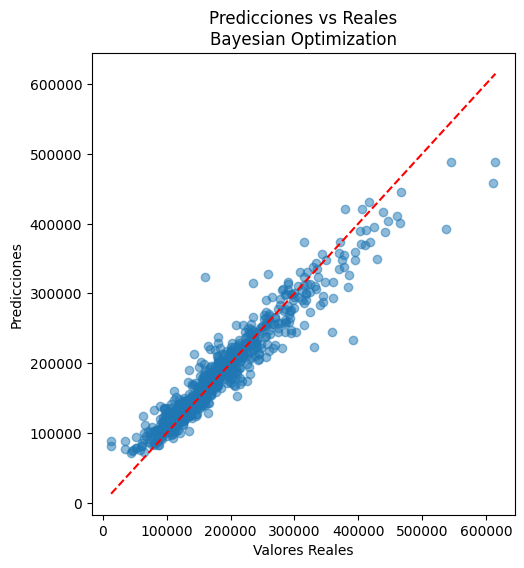

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform
import optuna
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# Pipeline base (aunque RandomForest no necesita escalado)
base_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Mantenemos por consistencia
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

## 1. Grid Search para Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    base_pipe,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados Grid Search
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    pipe = base_pipe.set_params(**param)
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)
    grid_results.append({
        'params': param,
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

## 2. Random Search para Random Forest
param_dist = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': [None] + list(range(5, 50, 5)),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    base_pipe,
    param_distributions=param_dist,
    n_iter=30,
    cv=cv,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados Random Search
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    pipe = base_pipe.set_params(**param)
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)
    random_results.append({
        'params': param,
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

## 3. Bayesian Optimization para Random Forest
bayes_results = []

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    model.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(model, Xtrain_encoded, ytrain)

    bayes_results.append({
        'trial': trial.number,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

    return metrics['MSE']

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=30)

# Resultados Bayesian Optimization
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]

## Imprimir resultados detallados para cada método

print("\n=== Resultados Detallados ===")

# Grid Search
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\n--- Mejor Resultado Grid Search ---")
print(f"  n_estimators: {best_grid['params']['model__n_estimators']}")
print(f"  max_depth: {best_grid['params']['model__max_depth']}")
print(f"  min_samples_split: {best_grid['params']['model__min_samples_split']}")
print(f"  min_samples_leaf: {best_grid['params']['model__min_samples_leaf']}")
print(f"  MSE   = {best_grid['MSE']:.6f}")
print(f"  MAE   = {best_grid['MAE']:.6f}")
print(f"  MAPE  = {best_grid['MAPE']:.6f}")
print(f"  R2    = {best_grid['R2']:.6f}")

# Random Search
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\n--- Mejor Resultado Random Search ---")
print(f"  n_estimators: {best_random['params']['model__n_estimators']}")
print(f"  max_depth: {best_random['params']['model__max_depth']}")
print(f"  min_samples_split: {best_random['params']['model__min_samples_split']}")
print(f"  min_samples_leaf: {best_random['params']['model__min_samples_leaf']}")
print(f"  max_features: {best_random['params']['model__max_features']}")
print(f"  MSE   = {best_random['MSE']:.6f}")
print(f"  MAE   = {best_random['MAE']:.6f}")
print(f"  MAPE  = {best_random['MAPE']:.6f}")
print(f"  R2    = {best_random['R2']:.6f}")

# Bayesian Optimization
print("\n--- Mejor Resultado Bayesian Optimization ---")
print(f"  n_estimators: {best_bayes['n_estimators']}")
print(f"  max_depth: {best_bayes['max_depth']}")
print(f"  min_samples_split: {best_bayes['min_samples_split']}")
print(f"  min_samples_leaf: {best_bayes['min_samples_leaf']}")
print(f"  max_features: {best_bayes['max_features']}")
print(f"  MSE   = {best_bayes['MSE']:.6f}")
print(f"  MAE   = {best_bayes['MAE']:.6f}")
print(f"  MAPE  = {best_bayes['MAPE']:.6f}")
print(f"  R2    = {best_bayes['R2']:.6f}")

# Preparar resultados con estructura uniforme
all_best = [
    ('Grid Search', {
        'params': best_grid['params'],
        'metrics': {k: best_grid[k] for k in ['MSE', 'MAE', 'MAPE', 'R2']}
    }),
    ('Random Search', {
        'params': best_random['params'],
        'metrics': {k: best_random[k] for k in ['MSE', 'MAE', 'MAPE', 'R2']}
    }),
    ('Bayesian Optimization', {
        'params': {
            'model__n_estimators': best_bayes['n_estimators'],
            'model__max_depth': best_bayes['max_depth'],
            'model__min_samples_split': best_bayes['min_samples_split'],
            'model__min_samples_leaf': best_bayes['min_samples_leaf'],
            'model__max_features': best_bayes['max_features']
        },
        'metrics': {k: best_bayes[k] for k in ['MSE', 'MAE', 'MAPE', 'R2']}
    })
]

# Seleccionar el mejor método según el MSE
best_method_name, best_method = min(all_best, key=lambda x: x[1]['metrics']['MSE'])

# Entrenar el modelo final con los mejores hiperparámetros
final_model = base_pipe.set_params(**best_method['params'])
final_model.fit(Xtrain_encoded, ytrain)

# Evaluación en el conjunto de prueba
test_metrics = evaluate_model(final_model, Xtest_encoded, ytest)

# Mostrar resultados
print(f"\n=== Rendimiento en Test ({best_method_name}) ===")
print(f"  MSE   = {test_metrics['MSE']:.6f}")
print(f"  MAE   = {test_metrics['MAE']:.6f}")
print(f"  MAPE  = {test_metrics['MAPE']:.6f}")
print(f"  R2    = {test_metrics['R2']:.6f}")

# Gráficos comparativos
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
plt.subplot(1, 2, 1)
plt.scatter(ytest, final_model.predict(Xtest_encoded), alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.title(f"Predicciones vs Reales\n{best_method_name}")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

In [48]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [49]:
plot_param_importances(study)

#**9 Support Vector Machines Regressor**

[I 2025-05-25 01:31:59,960] A new study created in memory with name: no-name-3ba13c4d-edb4-475f-b8ca-6f105b5e7d04
[I 2025-05-25 01:32:00,368] Trial 0 finished with value: 6772744810.883216 and parameters: {'kernel': 'linear', 'C': 0.8806926076129271, 'gamma': 'auto'}. Best is trial 0 with value: 6772744810.883216.
[I 2025-05-25 01:32:01,039] Trial 1 finished with value: 6856345049.734176 and parameters: {'kernel': 'sigmoid', 'C': 5.434379651268017, 'gamma': 'auto'}. Best is trial 0 with value: 6772744810.883216.
[I 2025-05-25 01:32:01,726] Trial 2 finished with value: 6864489436.113566 and parameters: {'kernel': 'sigmoid', 'C': 0.33039284712551936, 'gamma': 'auto'}. Best is trial 0 with value: 6772744810.883216.
[I 2025-05-25 01:32:02,153] Trial 3 finished with value: 6340917617.291312 and parameters: {'kernel': 'poly', 'C': 1.3533429614646764, 'gamma': 'scale'}. Best is trial 3 with value: 6340917617.291312.
[I 2025-05-25 01:32:02,597] Trial 4 finished with value: 6765989351.6601515 a


Best Grid Search Result:
    kernel    = poly
    C    = 100
    gamma    = scale
    MSE    = 1430451898.258953
    MAE    = 21582.657103
    MAPE    = 0.118032
    R2    = 0.795141

Best Random Search Result:
    kernel    = poly
    C    = 100
    gamma    = scale
    MSE    = 1430451898.258953
    MAE    = 21582.657103
    MAPE    = 0.118032
    R2    = 0.795141

Best Bayesian Optimization Result:
    kernel    = poly
    C    = 96.39001446252689
    gamma    = scale
    MSE    = 1342933377.217916
    MAE    = 21771.074283
    MAPE    = 0.118935
    R2    = 0.791907

=== Rendimiento en Test ===
    MSE    = 1245215961.620559
    MAE    = 21570.024738
    MAPE    = 0.137715
    R2    = 0.798840


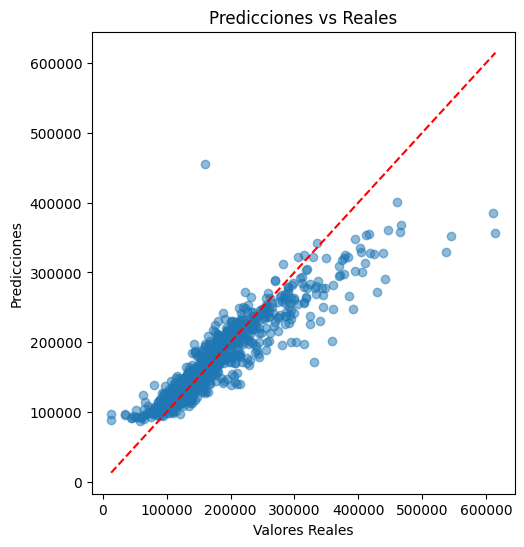

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, uniform
import optuna
import warnings
warnings.filterwarnings('ignore')

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar múltiples métricas
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        'MSE': mean_squared_error(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MAPE': mean_absolute_percentage_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

# --- Grid Search para svm ---
param_grid = {
    'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__gamma': ['scale', 'auto']
}
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', svm.SVR())
])
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con múltiples métricas
grid_results = []
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    grid_results.append({
        'kernel': param['regressor__kernel'],
        'C': param['regressor__C'],
        'gamma': param['regressor__gamma'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# --- Random Search para svm ---
param_dist = {
    'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=cv,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(Xtrain_encoded, ytrain)

# Almacenar resultados con multiples metricas
random_results = []
for param, score in zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score']):
    pipeline.set_params(**param)
    pipeline.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipeline, Xtrain_encoded, ytrain)
    random_results.append({
        'kernel': param['regressor__kernel'],
        'C': param['regressor__C'],
        'gamma': param['regressor__gamma'],
        'MSE': -score,
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })

# ---Bayesian Optimization para svm ---
bayes_results = []

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.1, 100, log=True)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', svm.SVR(kernel=kernel, C=C, gamma=gamma))
    ])
    pipe.fit(Xtrain_encoded, ytrain)
    metrics = evaluate_model(pipe, Xtrain_encoded, ytrain)
    bayes_results.append({
        'trial': trial.number,
        'kernel': kernel,
        'C': C,
        'gamma': gamma,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE'],
        'R2': metrics['R2']
    })
    return metrics['MSE']

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# ---Resultados del Grid Seacrh ---
best_grid_index = np.argmin([res['MSE'] for res in grid_results])
best_grid = grid_results[best_grid_index]
print("\nBest Grid Search Result:")
print(f"    kernel    = {best_grid['kernel']}")
print(f"    C    = {best_grid['C']}")
print(f"    gamma    = {best_grid['gamma']}")
print(f"    MSE    = {best_grid['MSE']:.6f}")
print(f"    MAE    = {best_grid['MAE']:.6f}")
print(f"    MAPE    = {best_grid['MAPE']:.6f}")
print(f"    R2    = {best_grid['R2']:.6f}")

# --- Resultados del Random Search ---
best_random_index = np.argmin([res['MSE'] for res in random_results])
best_random = random_results[best_random_index]
print("\nBest Random Search Result:")
print(f"    kernel    = {best_random['kernel']}")
print(f"    C    = {best_random['C']}")
print(f"    gamma    = {best_random['gamma']}")
print(f"    MSE    = {best_random['MSE']:.6f}")
print(f"    MAE    = {best_random['MAE']:.6f}")
print(f"    MAPE    = {best_random['MAPE']:.6f}")
print(f"    R2    = {best_random['R2']:.6f}")

# --- Resultados de Bayesian Optimization ---
best_bayes_index = np.argmin([res['MSE'] for res in bayes_results])
best_bayes = bayes_results[best_bayes_index]
print("\nBest Bayesian Optimization Result:")
print(f"    kernel    = {best_bayes['kernel']}")
print(f"    C    = {best_bayes['C']}")
print(f"    gamma    = {best_bayes['gamma']}")
print(f"    MSE    = {best_bayes['MSE']:.6f}")
print(f"    MAE    = {best_bayes['MAE']:.6f}")
print(f"    MAPE    = {best_bayes['MAPE']:.6f}")
print(f"    R2    = {best_bayes['R2']:.6f}")

# --- Evaluación en el conjunto de prueba con el mejor modelo ---
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', svm.SVR(kernel=best_grid['kernel'], C=best_grid['C'], gamma=best_grid['gamma']))
])
best_model.fit(Xtrain_encoded, ytrain)
y_pred_test = best_model.predict(Xtest_encoded)
test_metrics = evaluate_model(best_model, Xtest_encoded, ytest)

print("\n=== Rendimiento en Test ===")
print(f"    MSE    = {test_metrics['MSE']:.6f}")
print(f"    MAE    = {test_metrics['MAE']:.6f}")
print(f"    MAPE    = {test_metrics['MAPE']:.6f}")
print(f"    R2    = {test_metrics['R2']:.6f}")

# --- Gráfico de dispersión ytest vs y_pred_test ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ytest, y_pred_test, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.title("Predicciones vs Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

In [51]:
from optuna.visualization import (plot_optimization_history,plot_param_importances, plot_parallel_coordinate,plot_contour)
plot_optimization_history(study)

In [52]:
plot_param_importances(study)